In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =  pd.read_csv("/content/drive/MyDrive/Placement_Projects/StockPrice/MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400


# About the DataSet

Date: This column represents the specific date associated with the stock trading activity. Each row in the dataset corresponds to a particular date.

Open: The "Open" price refers to the price at which the stock started trading on a particular day. It is the first recorded price for that day's trading session.

High: The "High" price represents the highest price at which the stock traded during the day. It shows the peak price reached by the stock within that trading session.

Low: The "Low" price is the lowest price at which the stock traded during the day. It indicates the bottom price reached by the stock within that trading session.

Close: The "Close" price refers to the final price at which the stock traded on that day. It is the last recorded price for that day's trading session.

Adj Close: It is an adjustment to the stocks closing price to represent the stocks worth after any corporate action have taken place

Volume: The "Volume" column represents the total number of shares traded during the day. It indicates the level of trading activity or liquidity for that particular stock on that date.

In [ ]:
df.shape

(9401, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9401.000000,9401.000000,9401.000000,9401.000000,9401.000000,9.401000e+03
mean,49.031383,49.561792,48.494466,49.047438,43.656941,5.775576e+07
std,71.895636,72.645679,71.125966,71.927685,71.987800,3.821170e+07
min,0.088542,0.092014,0.088542,0.090278,0.056201,2.304000e+06
25%,5.375000,5.468750,5.304688,5.390625,3.355866,3.347280e+07
50%,27.080000,27.375000,26.850000,27.110001,19.066265,5.095560e+07
75%,43.875000,44.299999,43.270000,43.900002,33.811615,7.152960e+07
max,351.320007,351.470001,342.200012,348.100006,348.100006,1.031789e+09


# Data PreProcessing

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#we are considering the date and the closing value of the particular day  (discard the remainaing columns)

df  = df[['Date', 'Close']]
df.head()imp

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090


In [ ]:
#As we notice the date column consists of the date which is actually of string datatype

df.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
import datetime

def dateformating(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_obj = dateformating('1986-03-13')
datetime_obj

datetime.datetime(1986, 3, 13, 0, 0)

In [ ]:
#apply this function to whole df (also not calling the function instead we are passing the function)

df['Date'] = df['Date'].apply(dateformating)

In [ ]:
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [ ]:
df.head()  #Lets take out the index and make the date coulmn as our index for easy access

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090


In [ ]:
df.index = df.pop('Date')
df.head()

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090


In [ ]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-06-26,328.600006
2023-06-27,334.570007
2023-06-28,335.850006


# EDA

**Lets check upon the growth of the stocks with respect to year**

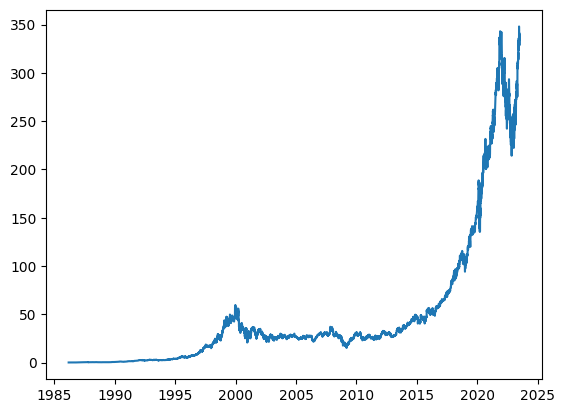

In [ ]:
plt.plot(df.index, df['Close'])

We can infer that from 1986 to 2023 the stock grows well after it hits 2015 or 2016 then there is a minor drop in 2022

In [ ]:
display(df.iloc[3])   #initial date for the windowed_df
print()
display(df.iloc[-1])  #Last date for the windowed_df

Close    0.099826
Name: 1986-03-18 00:00:00, dtype: float64

Close    340.540009
Name: 2023-06-30 00:00:00, dtype: float64

In [ ]:
#Convert into supervised learning problem

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = dateformating(first_date_str)
  last_date  = dateformating(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

#windowed_df consist of date and the close as (Target-3, Target-2, Target-1, Target)

#date with the 3 previous value (Target-3, Target-2, Target-1,) and then the actual closing price (Target)

#Will be considering the Target-3, Target-2, Target-1 as inputs and the target as output

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [ ]:
#Now we need to conver this into numpy array to feed into tensorflow model

#date, X: input (3Demensional) and y: output

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((252,), (252, 3, 1), (252,))

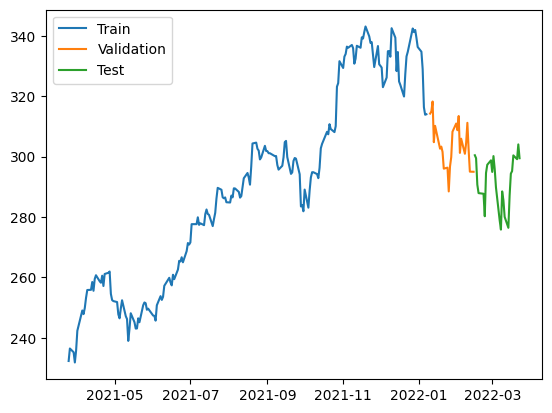

In [ ]:
#splitting the data into Train, Test and validation

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 101ms/step - loss: 84415.2031 - mean_absolute_error: 288.7992 - val_loss: 92014.2266 - val_mean_absolute_error: 303.2511
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 84045.0938 - mean_absolute_error: 288.1556 - val_loss: 91590.7266 - val_mean_absolute_error: 302.5521
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 83606.8594 - mean_absolute_error: 287.3964 - val_loss: 91067.1719 - val_mean_absolute_error: 301.6856
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 83054.4609 - mean_absolute_error: 286.4330 - val_loss: 90370.2812 - val_mean_absolute_error: 300.5284
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 82312.7812 - mean_absolute_error: 285.1363 - val_loss: 89461.3203 - val_mean_absolute_error: 299.0123
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 81389.5625 - mean_absolute_error: 283.5095 - val_loss: 88

7/7 [==============================] - 1s 4ms/step


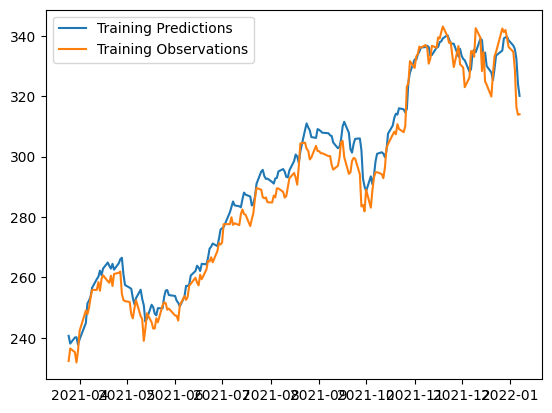

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 25ms/step


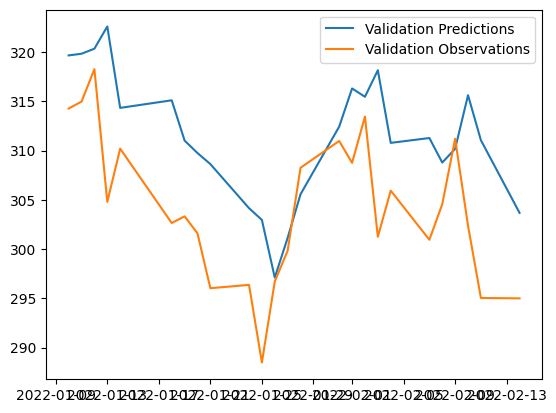

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


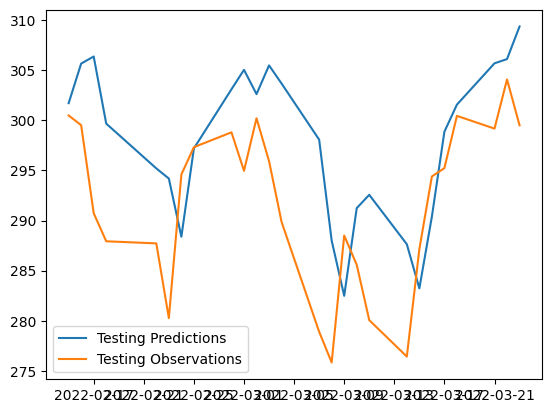

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

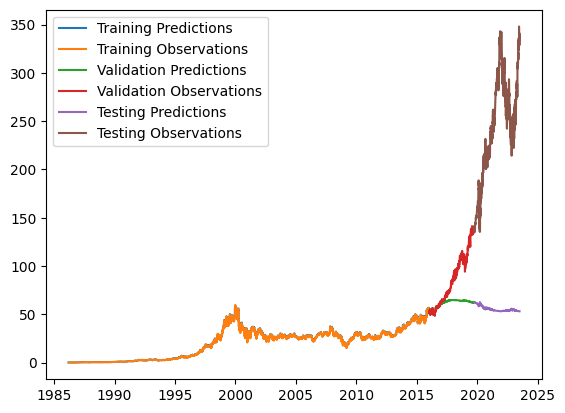

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 22ms/step


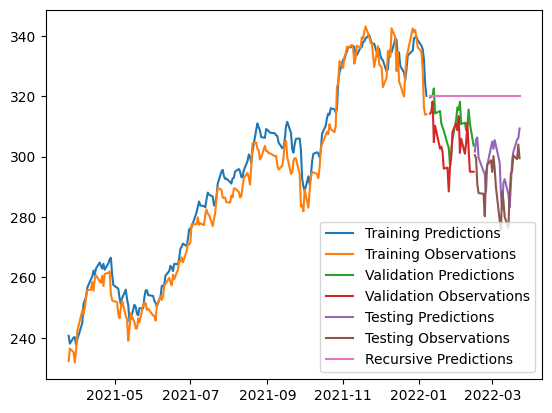

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])